# Task 2: Data Profiling, Cleaning & EDA for sierra_leone.

In [6]:
# Sierra Leone EDA Notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [7]:
# Load dataset
sierra_df = pd.read_csv("sierraleone-bumbuna.csv")

In [8]:
# to see the first five rows of the dataset.
sierra_df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [9]:
# Summary Statistics & Missing Value Report
print(sierra_df.describe())
print("\nMissing Values:")
print(sierra_df.isna().sum())


                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0.000000      23.1000

In [10]:
# Identify columns with >5% missing values
threshold = 0.05 * len(sierra_df)
print("\nColumns with >5% missing:")
print(sierra_df.columns[sierra_df.isna().sum() > threshold])

# Outlier Detection
for col in ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]:
    sierra_df[f"z_{col}"] = zscore(sierra_df[col].fillna(sierra_df[col].median()))
    outliers = sierra_df[np.abs(sierra_df[f"z_{col}"]) > 3]
    print(f"Outliers in {col}: {len(outliers)}")



Columns with >5% missing:
Index(['Comments'], dtype='object')
Outliers in GHI: 2477
Outliers in DNI: 7586
Outliers in DHI: 2986
Outliers in ModA: 1604
Outliers in ModB: 2041
Outliers in WS: 3967
Outliers in WSgust: 3665


In [11]:
# Impute missing values with median
cols_to_impute = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]
for col in cols_to_impute:
    sierra_df[col].fillna(sierra_df[col].median(), inplace=True)


C:\Users\dell\AppData\Local\Temp\ipykernel_13100\3034185811.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sierra_df[col].fillna(sierra_df[col].median(), inplace=True)


In [12]:
# Export cleaned data
sierra_df.to_csv("data/sierraleone_clean.csv", index=False)


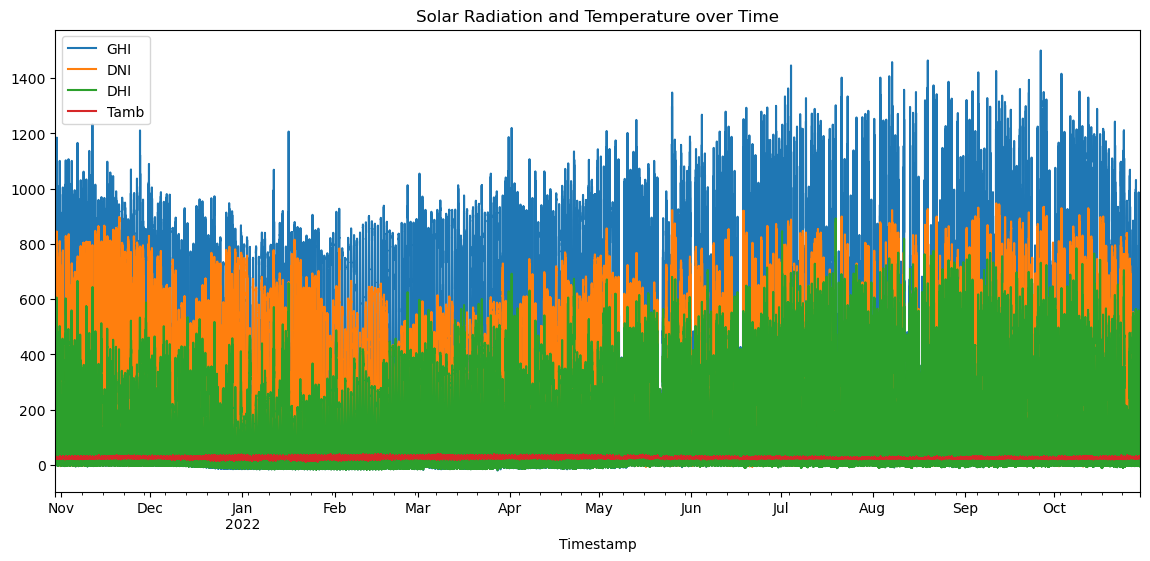

In [13]:
# Time Series Analysis
sierra_df['Timestamp'] = pd.to_datetime(sierra_df['Timestamp'])
sierra_df.set_index('Timestamp', inplace=True)
sierra_df[["GHI", "DNI", "DHI", "Tamb"]].plot(figsize=(14,6))
plt.title("Solar Radiation and Temperature over Time")
plt.show()

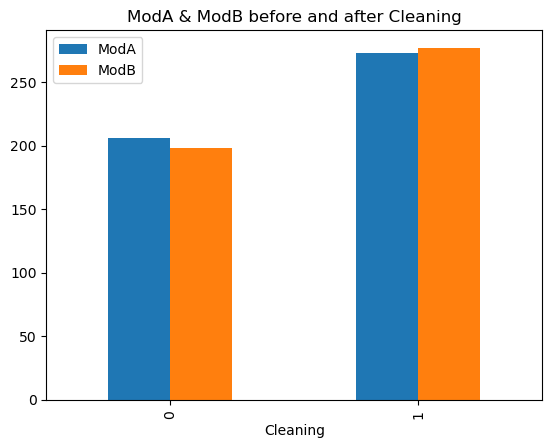

In [14]:
# Cleaning Impact
sierra_df.groupby("Cleaning")[["ModA", "ModB"]].mean().plot(kind='bar')
plt.title("ModA & ModB before and after Cleaning")
plt.show()

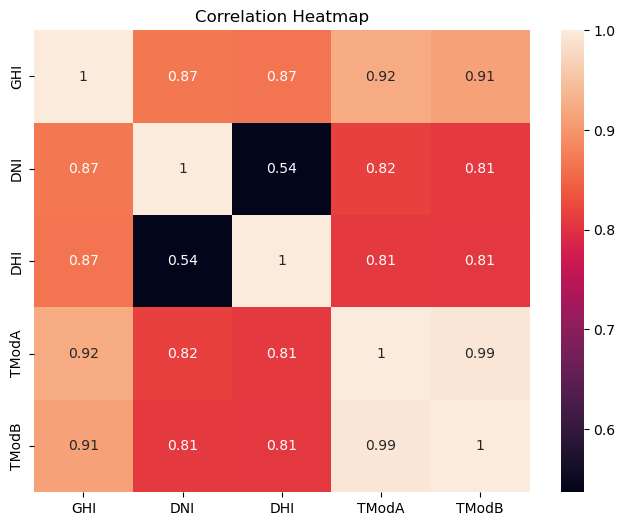

In [15]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(sierra_df[["GHI", "DNI", "DHI", "TModA", "TModB"]].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

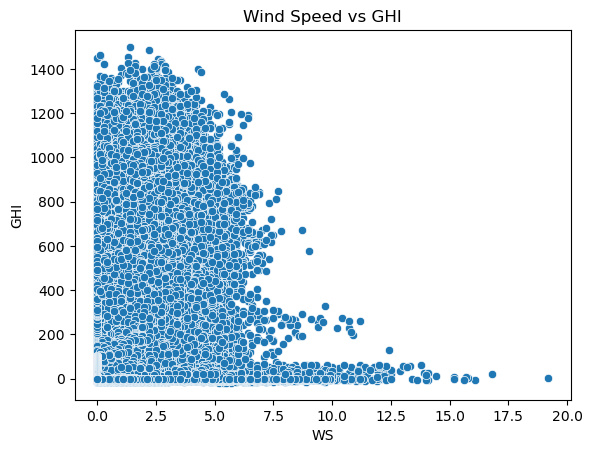

In [16]:
# Scatter Plots
sns.scatterplot(data=sierra_df, x="WS", y="GHI")
plt.title("Wind Speed vs GHI")
plt.show()

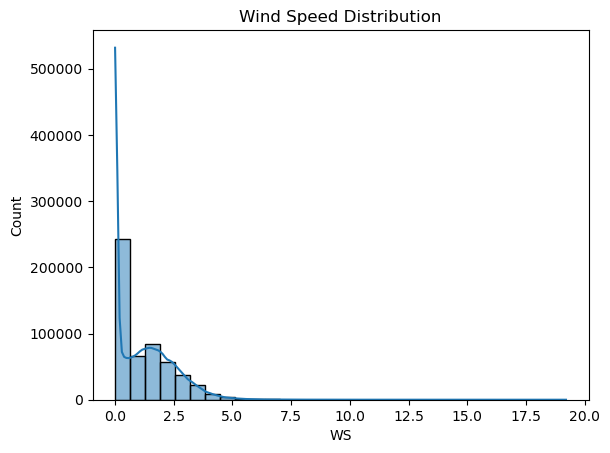

In [17]:
# Wind Distribution
sns.histplot(sierra_df["WS"], bins=30, kde=True)
plt.title("Wind Speed Distribution")
plt.show()


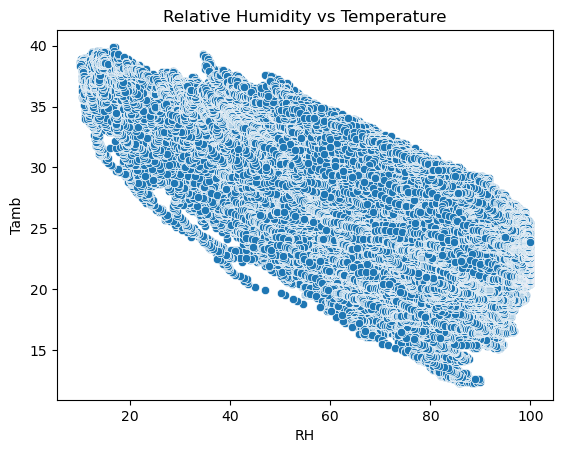

In [18]:
# Temperature and RH
sns.scatterplot(data=sierra_df, x="RH", y="Tamb")
plt.title("Relative Humidity vs Temperature")
plt.show()

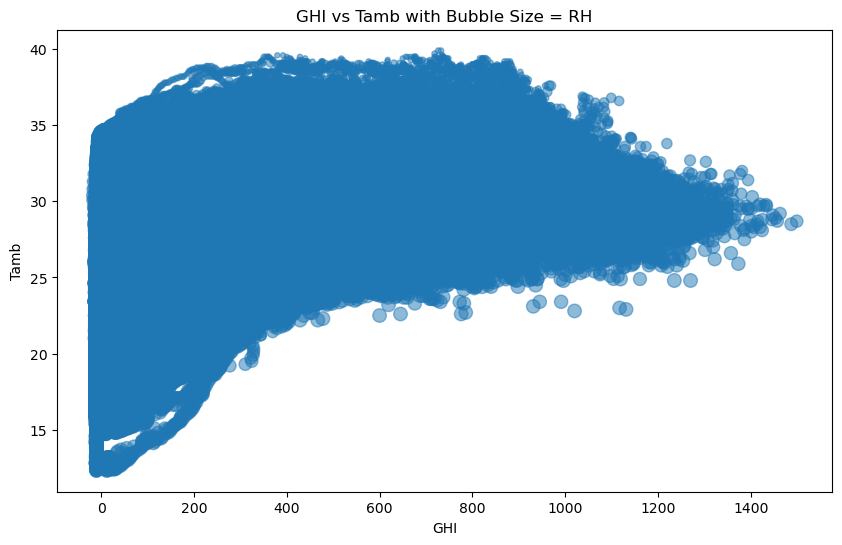

In [19]:
# Bubble Chart
plt.figure(figsize=(10,6))
plt.scatter(sierra_df['GHI'], sierra_df['Tamb'], s=sierra_df['RH'], alpha=0.5)
plt.xlabel("GHI")
plt.ylabel("Tamb")
plt.title("GHI vs Tamb with Bubble Size = RH")
plt.show()